In [1]:
pip install hmmlearn

     |████████████████████████████████| 120 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 87.7 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 3.8 MB/s eta 0:00:011
     |████████████████████████████████| 303 kB 79.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
from hmmlearn import hmm

#read data
X_all = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/train_1.csv', delimiter=',')
lengths = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/len_train_1.csv', delimiter=',')
print(lengths)

X_test = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/test_2.csv', delimiter=',')
ilengths = lengths.astype(np.int64)

[43. 46. 43. 44. 44. 43. 44. 42. 45. 45. 43. 43. 43. 46. 44. 46. 44. 44.
 42. 44. 44. 44. 42. 42. 43. 45. 44. 44. 46. 44. 43. 45. 48. 47. 46. 43.
 45. 44. 44. 46. 42. 41. 42. 46. 45. 46. 45. 46. 43. 44. 43. 43. 44. 44.
 44. 48. 44. 43. 42. 42. 41. 45. 44. 41. 43. 44. 46. 46. 42. 44. 42. 43.
 45. 43. 44. 42. 45. 43. 46. 45. 45. 45. 47. 45. 45. 41. 44. 43. 45. 42.
 44. 46. 44. 41. 43. 43. 43. 47. 43. 43.]


[[ 0.40992876  0.3657831 ]
 [ 0.97739819  2.57457835]
 [ 1.10065935 -0.42720217]
 ...
 [ 5.45725064 -2.63430923]
 [ 5.83910374 -2.9801684 ]
 [ 4.18615229 -2.75845215]]
(4403, 2)


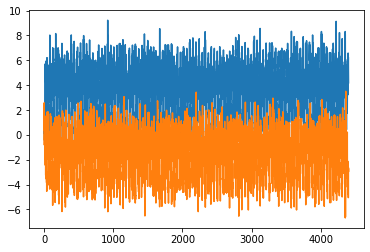

In [26]:
print(X_all)
print(X_all.shape)
plt.plot(X_all)

In [33]:
#train hmm
model = hmm.GaussianHMM(n_components=3, n_iter=100, init_params='mc',params='mct')#mc=平均と、mct=平均と共分散とタイムを学習してね
model.startprob_ = np.array([1.0, 0.0, 0.0])#start
model.transmat_ = np.array([[0.5, 0.5, 0.0],#state1→state2の遷移確率,最初0だとずっと0が維持される、1→3まで
        [0.0, 0.5, 0.5],#state２→state3の遷移確率
        [0.0, 0.0, 1.0]])#state3の遷移確率, [0.5, 0.0, 0.5]で
model.fit(X_all,ilengths)
#HMM stats
print(model.means_)
print(model.covars_)
print(model.transmat_)
print(model.predict(X_test))
print(model.score(X_test))
#train1 -194.90
#train2 -571.89
print("尤度比=",-194.90-(-571.89),"train2の方が正常")
#test2- train1  -200.64
#testt2-train2 -136.89 
print("尤度比=",-200.64-(-136.89)"train1の方が異常")

[[ 2.97836332  3.03128264]
 [ 8.07489399 -0.00969366]
 [ 7.67274377  0.13392246]]
[[[4.72647647 0.        ]
  [0.         4.54198015]]

 [[2.07584991 0.        ]
  [0.         2.10966229]]

 [[0.82012085 0.        ]
  [0.         1.72871338]]]
[[0.96981342 0.03018658 0.        ]
 [0.         0.9729233  0.0270767 ]
 [0.         0.         1.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1]
-235.39963869888481
尤度比= 376.99
尤度比= -63.75


In [9]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 3.8 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
  Using cached Pillow-8.2.0-cp37-cp37m-macosx_10_10_x86_64.whl (2.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt

#read data
X_all = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/train_1.csv', delimiter=',')
X_test = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/test_1.csv', delimiter=',')

X_train2 = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/train_2.csv', delimiter=',')
X_test2 = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa/test_2.csv', delimiter=',')

#train gmm
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')#正規分布３つ、
#gmm.fit(X_all)
gmm.fit(X_train2)
z=gmm.predict(X_all)#学習データがどのGausianに当てはまるか

[0.36571321 0.33344922 0.30083758]
[[ 1.01511724  0.01922139]
 [ 5.3789887  -3.51515409]
 [ 4.11098571 -1.19731448]]
[[[ 1.00636371 -0.00566158]
  [-0.00566158  1.02609773]]

 [[ 1.23541356 -0.16208183]
  [-0.16208183  1.05531261]]

 [[ 1.1799738  -0.08208297]
  [-0.08208297  1.0124445 ]]]
尤度＝ -3.695560411791921


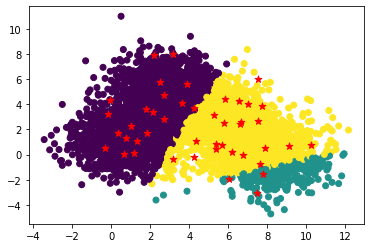

In [13]:
plt.scatter(X_all[:,0], X_all[:,1], c=z)
plt.scatter(X_test[:,0], X_test[:,1], s=50, marker='*', c='red')
plt.show
#GMM stats
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

print('尤度＝',gmm.score(X_test2))#テストデータを入れたときの尤度（対数尤度なのでマイナス)
#対数尤度比
#test1 -4.72
#test2 -12.05　　→ −4.72-(-12.05)=7.33 

-3.70

In [48]:
import numpy as np
from sklearn import mixture
from sklearn.model_selection import GridSearchCV
#read data
X_all = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa2/train_1.csv', delimiter=',')
components_params = np.arange(2, 5, 1) #start stop step(2,3,4を与えている)
print(components_params)

paramters = {
    'n_components': components_params
}
model_tuning = GridSearchCV(
    estimator = mixture.GaussianMixture(), # 識別器
    param_grid = paramters, # パラメタ
 )
model_tuning.fit(X_all)
print(model_tuning.best_params_)

[2 3 4]
{'n_components': 4}


In [47]:
import numpy as np
from hmmlearn import hmm

#read data
X_all = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa2/train_1.csv', delimiter=',')
lengths = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa2/len_train_1.csv', delimiter=',')
print(X_all)
#print(lengths)

X_test = np.loadtxt('/Users/ShuntaroMiwa/00 python/ichikawa2/test_2.csv', delimiter=',')
ilengths = lengths.astype(np.int64)

[[ 0.01359057  1.99004644]
 [ 0.74873248  3.34075786]
 [ 1.84009762  2.55807885]
 ...
 [ 7.42616148  2.10646113]
 [10.93627521  0.01272756]
 [ 7.14684751 -2.48462689]]


In [49]:
#train hmm
model = hmm.GaussianHMM(n_components=4, n_iter=100, init_params='mc',params='mct')#mc=平均と、mct=平均と共分散とタイムを学習してね
model.startprob_ = np.array([1.0, 0.0, 0.0,0.0])#start
model.transmat_ = np.array([[0.5, 0.5, 0.0,0.0],#state1→state2の遷移確率,最初0だとずっと0が維持される、1→3まで
        [0.0, 0.5, 0.5, 0.0],#state２→state3の遷移確率
        [0.0, 0.0, 0.5, 0.5],
        [0.0, 0.0, 0.0, 1.0]])#state3の遷移確率, [0.5, 0.0, 0.5]で
model.fit(X_all,ilengths)
#HMM stats
print(model.means_)
print(model.covars_)
print(model.transmat_)
print(model.predict(X_test))
print(model.score(X_test))
#train1 -194.90
#train2 -571.89
#print("尤度比=",-194.90-(-571.89),"train2の方が正常")
#test2- train1  -200.64
#testt2-train2 -136.89 
#print("尤度比=",-200.64-(-136.89)"train1の方が異常")

[[1.01632995e+00 1.12046918e+00]
 [9.80040054e-01 9.79351446e-01]
 [3.95859366e+00 4.02222100e+00]
 [8.01678779e+00 7.49182808e-03]]
[[[2.0807176  0.        ]
  [0.         1.79678991]]

 [[2.29540587 0.        ]
  [0.         1.91274561]]

 [[3.06804982 0.        ]
  [0.         2.92906816]]

 [[1.94660699 0.        ]
  [0.         2.05780592]]]
[[0.81676646 0.18323354 0.         0.        ]
 [0.         0.81929793 0.18070207 0.        ]
 [0.         0.         0.95475379 0.04524621]
 [0.         0.         0.         1.        ]]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
-224.56391635983894


In [ ]:
#尤度　test1, train1=-199.81